In [34]:
library(ggplot2)
library(readr)
library(dplyr)
library(openintro)
library(dummies)
library(dendextend)
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

# Measuring distance between continious data
## Calculate & plot the distance between two players

You've obtained the coordinates relative to the center of the field for two players in a soccer match and would like to calculate the distance between them.

In this exercise you will plot the positions of the 2 players and manually calculate the distance between them by using the Euclidean distance formula.

$$\sqrt{(x_1−x_2)^2+(y_1−y_2)^2}$$

In [1]:
two_players <- data.frame(x = c(5,15), y = c(4,10))

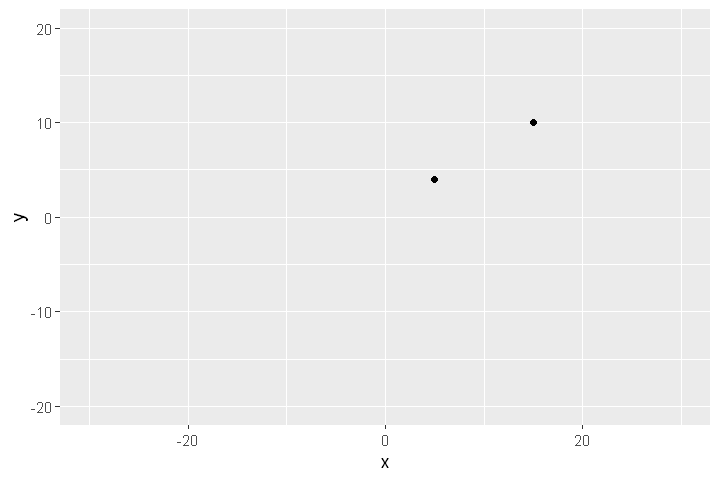

In [7]:
# Plot the positions of the players
ggplot(two_players, aes(x = x, y = y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))

In [8]:
# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$x - player2$x)^2 + (player1$y - player2$y)^2 )
player_distance

[1] 11.6619

## Using the dist() function

Using the Euclidean formula manually may be practical for 2 observations but can get more complicated rather quickly when measuring the distance between many observations.

The `dist()` function simplifies this process by calculating distances between our observations (rows) using their features (columns). In this case the observations are the player positions and the dimensions are their x and y coordinates.

Note: The default distance calculation for the `dist()` function is Euclidean distance

In [12]:
three_players <- two_players %>% add_row(x = 0, y = 20)

In [17]:
# Calculate the Distance Between two_players
dist_two_players <- dist(two_players)
dist_two_players

# Calculate the Distance Between three_players
dist_three_players <- dist(three_players)
dist_three_players

        1
2 11.6619

         1        2
2 11.66190         
3 16.76305 18.02776

In [20]:
data(trees)

## Effects of scale

You have learned that when a variable is on a larger scale than other variables in your data it may disproportionately influence the resulting distance calculated between your observations. Lets see this in action by observing a sample of data from the trees data set.

You will leverage the `scale()` function which by default centers & scales our column features.

Our variables are the following:
 * Girth - tree diameter in inches
 * Height - tree height in inches


In [24]:
# Calculate distance for three_trees 
dist_trees <- dist(trees[1:3,1:2])

# Scale three trees & calculate the distance  
scaled_three_trees <- scale(trees[1:3,1:2])
dist_scaled_trees <- dist(scaled_three_trees)

# Output the results of both Matrices
print('Without Scaling')
dist_trees

print('With Scaling')
dist_scaled_trees

[1] "Without Scaling"


         1        2
2 5.008992         
3 7.017834 2.009975

[1] "With Scaling"


          1         2
2 1.8286961          
3 2.7778767 0.9691601

# Measuring distance for categorical data
## Calculating distance between categorical variables

In this exercise you will explore how to calculate binary (Jaccard) distances. In order to calculate distances we will first have to dummify our categories using the `dummy.data.frame()` from the library dummies

$$J(1, 2) = \frac{1\cap2}{1\cup2}= \frac{1}{4} = 0.25 $$
$$ distance(1, 2) = 1 − J(1, 2) = 0.75 $$

You will use a small collection of survey observations stored in the data frame job_survey with the following columns:

    job_satisfaction Possible options: "Hi", "Mid", "Low"
    is_happy Possible options: "Yes", "No"


In [28]:
job_survey <- data.frame(job_satisfaction = c("Low", "Low", "Hi", "Low", "Mid"), is_happy = c("No", "No", "Yes", "No", "No"))

# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method = "binary")

# Print the Original Data
job_survey

# Print the Distance Matrix
dist_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

# Comparing more than two observation
## Calculating linkage

Let us revisit the example with three players on a field. The distance matrix between these three players is shown below and is available as the variable dist_players.

From this we can tell that the first group that forms is between players 1 & 2, since they are the closest to one another with a Euclidean distance value of 11.

Now you want to apply the three linkage methods you have learned to determine what the distance of this group is to player 3.

<b>Linkage Criteria</b>
 * Complete Linkage: maximum distance between two sets
 * Single Linkage: minimum distance between two sets
 * Average Linkage: average distance between two sets

In [31]:
dist_three_players

         1        2
2 11.66190         
3 16.76305 18.02776

In [33]:
# Extract the pair distances
distance_1_2 <- dist_three_players[1]
distance_1_3 <- dist_three_players[2]
distance_2_3 <- dist_three_players[3]

# Calculate the complete distance between group 1-2 and 3
complete <- max(c(distance_1_3, distance_2_3 ))
complete

# Calculate the single distance between group 1-2 and 3
single <- min(c(distance_1_3, distance_2_3))
single

# Calculate the average distance between group 1-2 and 3
average <- mean(c(distance_1_3, distance_2_3))
average


[1] 18.02776

[1] 16.76305

[1] 17.39541

# Capturing K clusters
## Assign cluster membership

In this exercise you will leverage the `hclust()` function to calculate the iterative linkage steps and you will use the `cutree()` function to extract the cluster assignments for the desired number (`k`) of clusters.

You are given the positions of 12 players at the start of a 6v6 soccer match. This is stored in the `lineup` dataframe.

You know that this match has two teams (k = 2), let's use the clustering methods you learned to assign which team each player belongs in based on their position.

Notes:

 * The linkage method can be passed via the method parameter: `hclust(distance_matrix, method = "complete")`
 * Remember that in soccer opposing teams start on their half of the field.
 * Because these positions are measured using the same scale we do not need to re-scale our data.


In [35]:
lineup <- readRDS("lineup.rds")

In [37]:
# Calculate the Distance
dist_players <- dist(lineup)

# Perform the hierarchical clustering using the complete linkage
hc_players <- hclust(dist_players)

# Calculate the assignment vector with a k of 2
clusters_k2 <- cutree(hc_players, k = 2)

# Create a new dataframe storing these results
lineup_k2_complete <- mutate(lineup, cluster = clusters_k2)

## Exploring the clusters

Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

In this exercise you will explore that data frame you created in the previous exercise lineup_k2_complete.

Reminder: The lineup_k2_complete dataframe contains the x & y positions of 12 players at the start of a 6v6 soccer game to which you have added clustering assignments based on the following parameters:

 * Distance: Euclidean
 * Number of Clusters (k): 2
 * Linkage Method: Complete


cluster,n
1,6
2,6


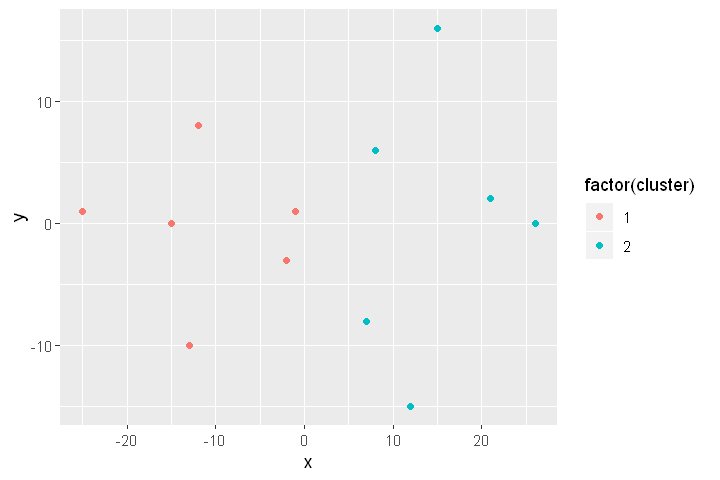

In [38]:
# Count the cluster assignments
count(lineup_k2_complete, cluster)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_k2_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Visualisation 
## Comparing average, single & complete linkage

You are now ready to analyze the clustering results of the lineup dataset using the dendrogram plot. This will give you a new perspective on the effect the decision of the linkage method has on your resulting cluster analysis.

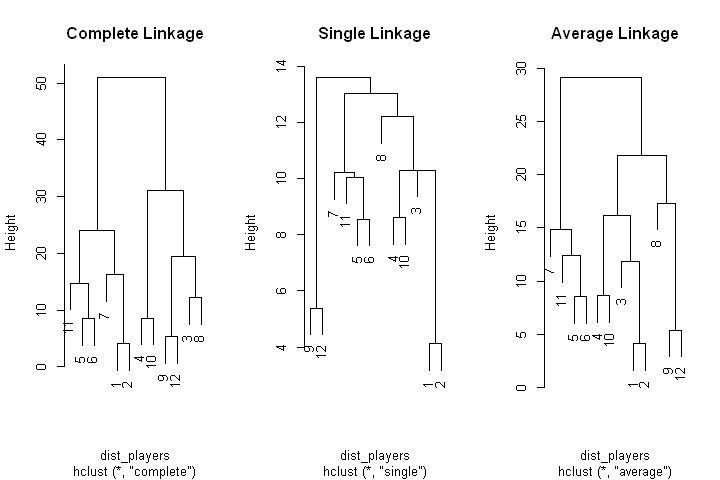

In [39]:
# Prepare the Distance Matrix
dist_players <- dist(lineup)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, method = "complete")
hc_single <- hclust(dist_players, method = "single")
hc_average <- hclust(dist_players, method = "average")

# Plot & Label the 3 Dendrograms Side-by-Side
# Hint: To see these Side-by-Side run the 4 lines together as one command
par(mfrow = c(1,3))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

<b>Height of the tree</b>

An advantage of working with a clustering method like hierarchical clustering is that you can describe the relationships between your observations based on both the distance metric and the linkage metric selected (the combination of which defines the height of the tree).

For the middle tree:we can concretely say that for the branch on a tree all members that are a part of that branch must have a minimum Euclidean distance amongst one another equal to or less than the height of that branch.

## Clusters based on height

In previous exercises you have grouped your observations into clusters using a pre-defined number of clusters (k). In this exercise you will leverage the visual representation of the dendrogram in order to group your observations into clusters using a maximum height (h), below which clusters form.

You will work the `color_branches()` function from the dendextend library in order to visually inspect the clusters that form at any height along the dendrogram.

The hc_players has been carried over from your previous work with the soccer line-up data.

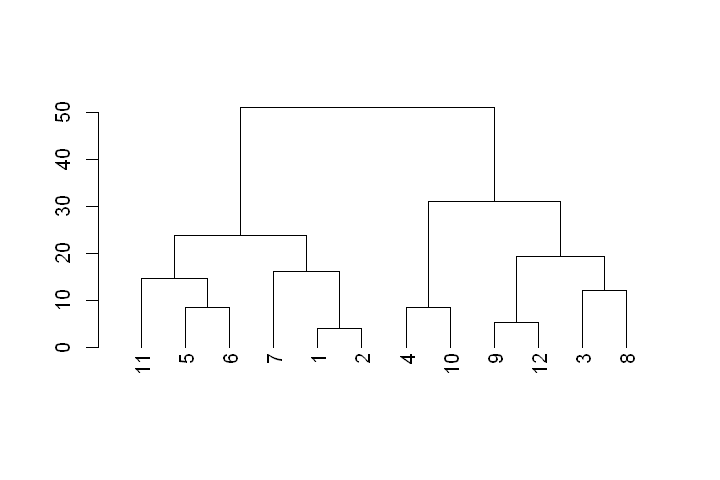

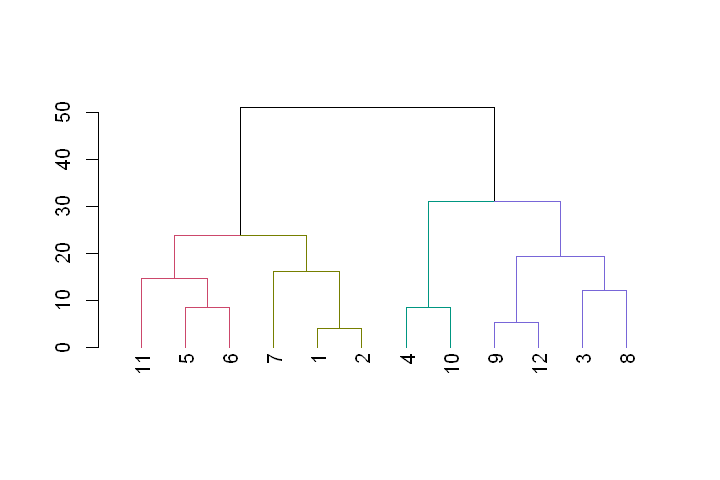

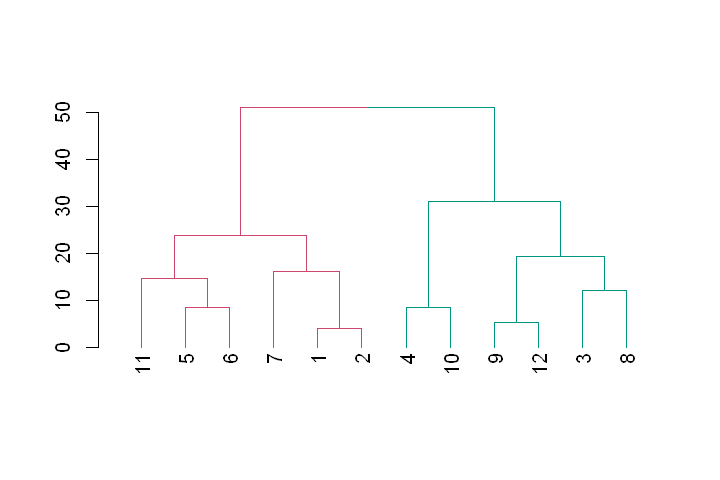

In [42]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)

# Plot the dendrogram
plot(dend_players)

# Color branches by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20)

# Color branches by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h = 40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)


## Exploring the branches cut from the tree

The cutree() function you used in exercises 5 & 6 can also be used to cut a tree at a given height by using the h parameter. Take a moment to explore the clusters you have generated from the previous exercises based on the heights 20 & 40.

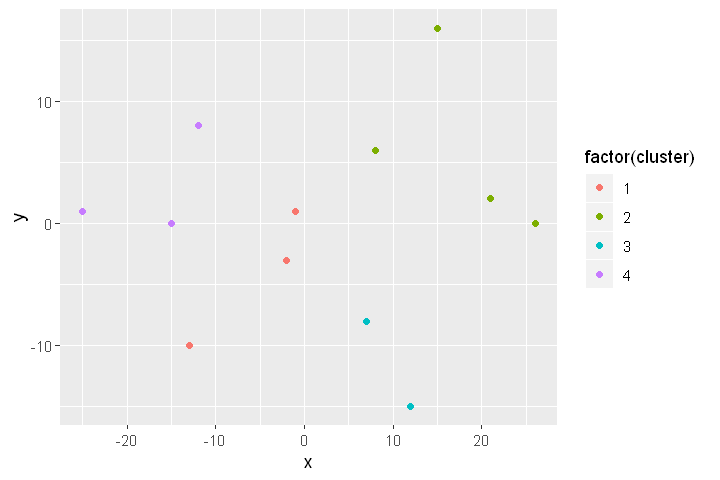

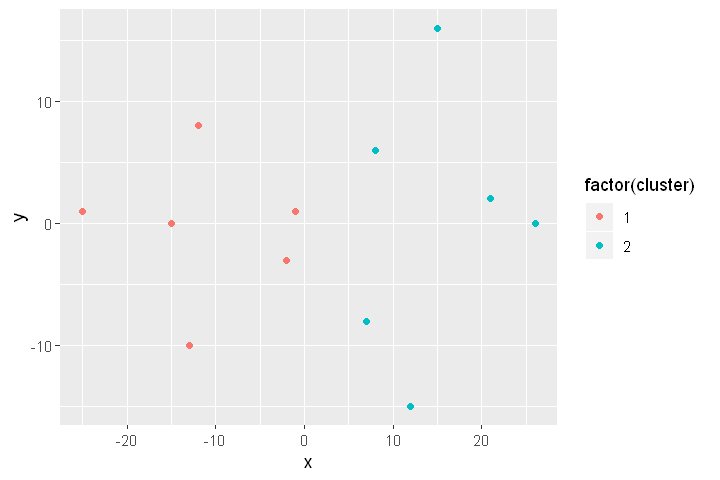

In [43]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a h of 20
clusters_h20 <- cutree(hc_players, h = 20)

# Create a new dataframe storing these results
lineup_h20_complete <- mutate(lineup, cluster = clusters_h20)

# Calculate the assignment vector with a h of 40
clusters_h40 <- cutree(hc_players, h = 40)

# Create a new dataframe storing these results
lineup_h40_complete <- mutate(lineup, cluster = clusters_h40)

# Plot the positions of the players and color them using their cluster for height = 20
ggplot(lineup_h20_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Plot the positions of the players and color them using their cluster for height = 40
ggplot(lineup_h40_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()


The height of any branch is determined by the linkage and distance decisions (in this case complete linkage and Euclidean distance). While the members of the clusters that form below a desired height have a maximum linkage+distance amongst themselves that - han the desired height.

### Segment wholesale customers

You're now ready to use hierarchical clustering to perform market segmentation (i.e. use consumer characteristics to group them into subgroups).

In this exercise you are provided with the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the dataframe customers_spend. Assign these clients into meaningful clusters.

Note: For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

In [49]:
customers_spend <- readRDS("ws_customers.rds")

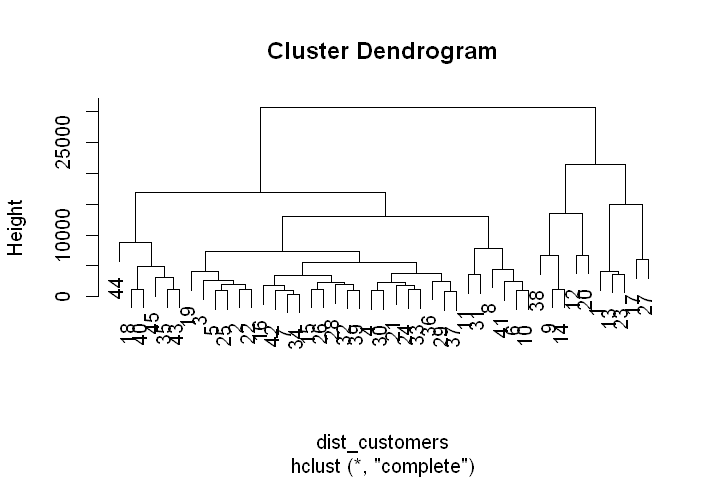

In [50]:
# Calculate Euclidean distance between customers
dist_customers <- dist(customers_spend, method = "euclidean")

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers, method = "complete")

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h = 15000)

# Generate the segmented customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)